In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Loading Data
##### About the dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [2]:
df = pd.read_csv("./Iris.csv",index_col= 'Id')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Transform data
Standardise data using StandardScaler from Sklearn


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
scaler = StandardScaler()

In [6]:
df[['SepalLengthCm_T','SepalWidthCm_T','PetalLengthCm_T','PetalWidthCm_T']] = scaler.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_T,SepalWidthCm_T,PetalLengthCm_T,PetalWidthCm_T
Id,,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
2,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
3,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
4,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
5,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977


#### Clustering Data
The data has 3 species so we will use 3 clusters. For unknown data, can use elbow method to identify the optimal number of clusters

##### Applying K Means Clustering


In [8]:
kmeans = KMeans(n_clusters=3)

In [9]:
kmeans.fit(df[['SepalLengthCm_T','SepalWidthCm_T','PetalLengthCm_T','PetalWidthCm_T']])

KMeans(n_clusters=3)

In [10]:
df['Cluster_ID'] = kmeans.labels_

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_T,SepalWidthCm_T,PetalLengthCm_T,PetalWidthCm_T,Cluster_ID
Id,,,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977,1
2,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977,1
3,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977,1
4,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977,1
5,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977,1
...,...,...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,1.038005,-0.124958,0.819624,1.447956,0
147,6.3,2.5,5.0,1.9,Iris-virginica,0.553333,-1.281972,0.705893,0.922064,2
148,6.5,3.0,5.2,2.0,Iris-virginica,0.795669,-0.124958,0.819624,1.053537,0


#### Plotting Results of KMeans

I used all 4 metrics for the clustering but for scatter plot I can only display 2 primary metrics, so I'll try all the combinations here.


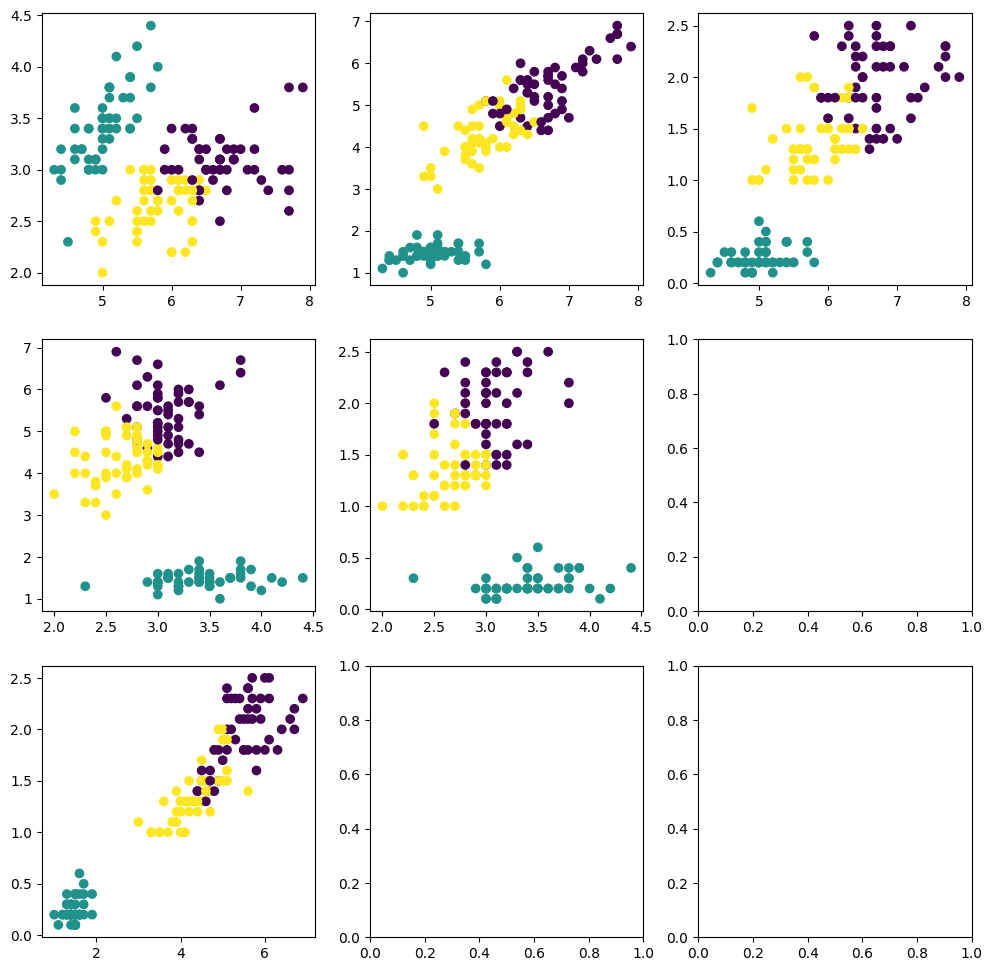

In [31]:
#Sepal Length Clusters
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(12,12))
#Sepal Length x Everything
ax1.scatter(x=df['SepalLengthCm'],y=df['SepalWidthCm'],c=df['Cluster_ID'])
ax2.scatter(x=df['SepalLengthCm'],y=df['PetalLengthCm'],c=df['Cluster_ID'])
ax3.scatter(x=df['SepalLengthCm'],y=df['PetalWidthCm'],c=df['Cluster_ID'])
#Sepal Width x Petals
ax4.scatter(x=df['SepalWidthCm'],y=df['PetalLengthCm'],c=df['Cluster_ID'])
ax5.scatter(x=df['SepalWidthCm'],y=df['PetalWidthCm'],c=df['Cluster_ID'])
#Petal Length x Width
ax7.scatter(x=df['PetalLengthCm'],y=df['PetalWidthCm'],c=df['Cluster_ID'])